In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Dropout, BatchNormalization

In [15]:
# Set the path to the train and test directories
train_data_dir = 'D:/data_split/train'
test_data_dir = 'D:/data_split/test'

# Set the number of classes and image dimensions
num_classes = 13
image_size = (96, 96)
batch_size = 8
class_names = [
    'Andorra_2019',
    'Common',
    'Lithuania_2021',
    'Monaco_2015',
    'Monaco_2016',
    'Monaco_2017',
    'Monaco_2018',
    'Monaco_2019',
    'SanMarino_2004',
    'SanMarino_2005',
    'Vatican_2004',
    'Vatican_2005',
    'Vatican_2006'
]


# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Normalization for testing/validation
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for loading the train and test images
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    classes = class_names,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42,
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    classes = class_names,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    classes = class_names,
    batch_size=batch_size,
    class_mode='categorical',
    #seed=42,
    shuffle=False
)


Found 2940 images belonging to 13 classes.
Found 726 images belonging to 13 classes.
Found 415 images belonging to 13 classes.


In [16]:
# Build the improved CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Add batch normalization
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer for regularization
model.add(Dense(num_classes, activation='softmax'))

model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 47, 47, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                      

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the number of training and validation steps per epoch
train_steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps_per_epoch = validation_generator.n // validation_generator.batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_steps_per_epoch
)

# Evaluate the model on the test dataset
test_steps_per_epoch = test_generator.n // test_generator.batch_size
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps_per_epoch)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



Epoch 1/50
367/367 [==============================] - 77s 202ms/step - loss: 4.0207 - accuracy: 0.1201 - val_loss: 8.8392 - val_accuracy: 0.0625
Epoch 2/50
367/367 [==============================] - 53s 143ms/step - loss: 2.6268 - accuracy: 0.1405 - val_loss: 2.8389 - val_accuracy: 0.0917
Epoch 3/50
367/367 [==============================] - 55s 151ms/step - loss: 2.5176 - accuracy: 0.1552 - val_loss: 2.6297 - val_accuracy: 0.1319
Epoch 4/50
367/367 [==============================] - 59s 161ms/step - loss: 2.4386 - accuracy: 0.1787 - val_loss: 2.6696 - val_accuracy: 0.1153
Epoch 5/50
367/367 [==============================] - 57s 156ms/step - loss: 2.3683 - accuracy: 0.1924 - val_loss: 7.7190 - val_accuracy: 0.1208
Epoch 6/50
367/367 [==============================] - 55s 150ms/step - loss: 2.3331 - accuracy: 0.2265 - val_loss: 6.5455 - val_accuracy: 0.1417
Epoch 7/50
367/367 [==============================] - 57s 155ms/step - loss: 2.3798 - accuracy: 0.2469 - val_loss: 3.9589 - val_ac

In [18]:
#saving model
model.save('C:/Users/spoor/Documents/Jupyter-works/my-model/my_model.h5')

model.save_weights('C:/Users/spoor/Documents/Jupyter-works/my-model/my_model_weights.h5')

In [19]:
#extracting saved model
model = tf.keras.models.load_model('C:/Users/spoor/Documents/Jupyter-works/my-model/my_model.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 47, 47, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                      

## Plot training/validation loss and accuracy using matplotlib

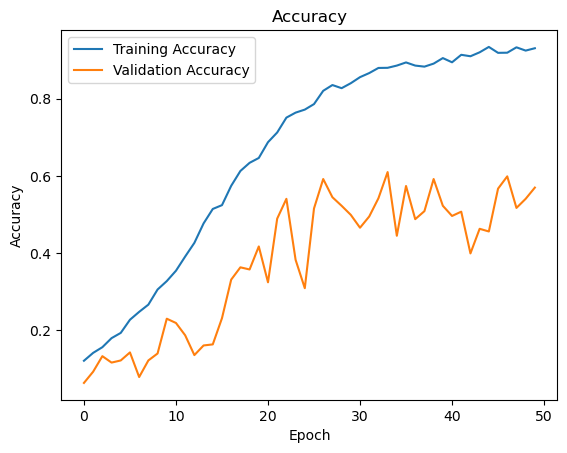

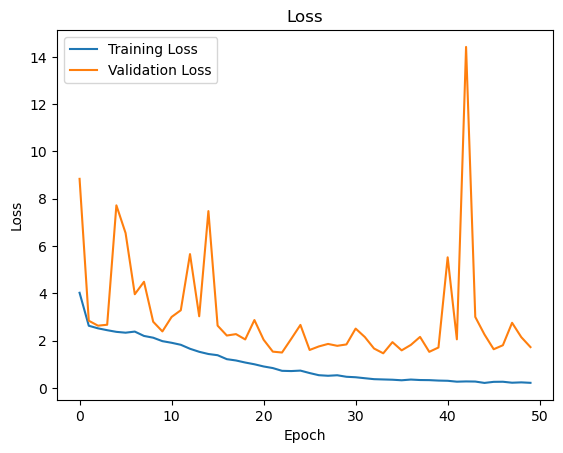

In [20]:
# Get the accuracy and loss history from the training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot accuracy and loss of the test dataset using matplotlib

51/51 [==============================] - 1s 21ms/step - loss: 1.2514 - accuracy: 0.6765
Test Loss: 1.251395583152771
Test Accuracy: 0.6764705777168274


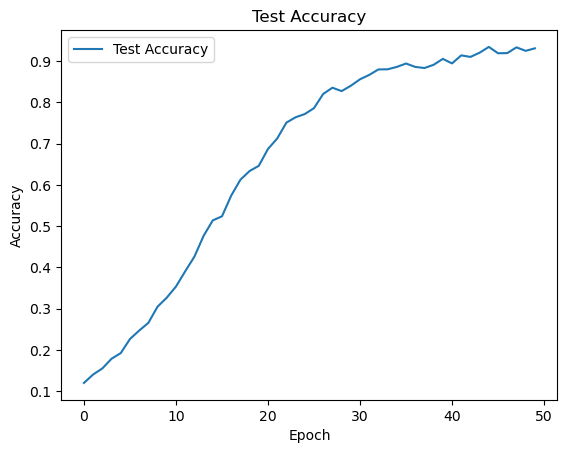

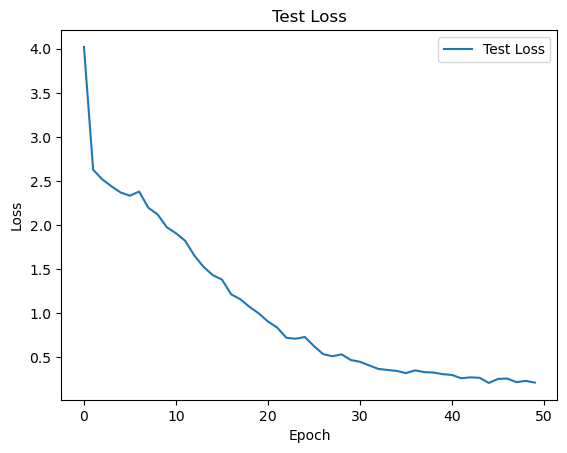

In [21]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps_per_epoch)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Get the accuracy and loss history from the training
test_acc = history.history['accuracy']
test_loss = history.history['loss']

# Plot accuracy
plt.plot(test_acc, label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(test_loss, label='Test Loss')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot the confusion matrix on the test set

52/52 [==============================] - 1s 20ms/step


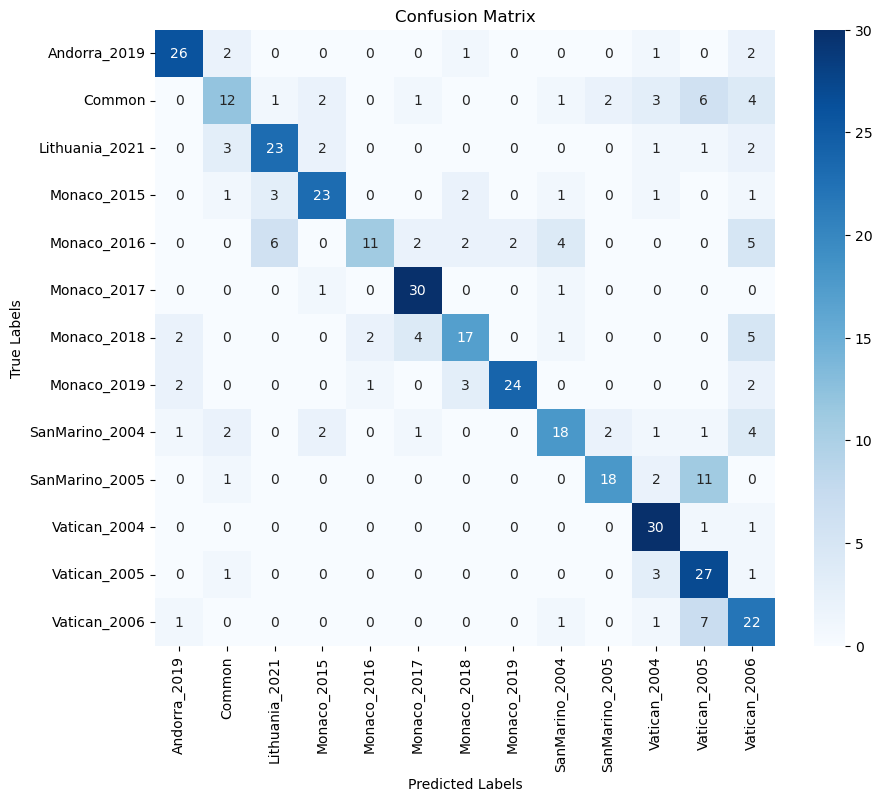

In [22]:

# Get the true labels for the test set
test_true_labels = test_generator.classes

# Predict the labels for the test set
test_pred_probs = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

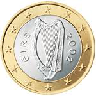

In [23]:
img = tf.keras.preprocessing.image.load_img('D:/common-test.jpg', target_size=(96, 96))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [24]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 0s 206ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [25]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[0]


In [26]:
# transform classes number into classes name
class_names[class_id.item()]

'Andorra_2019'